# 2. 인공 신경망(Artificial Neural Network) 훑어보기

## 1) 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)
- 순반향 신경망(Feed-Forward Neural Network)
<img src=mlp_final.png width=300>

- 순환 신경망(Recurrent Neural Network, RNN)
<img src=rnn_final.png width=300>

## 2) 전결합층(Fully-connected layer, FC, Dense layer)
- 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층을 **전결합층, 밀집층(Dense layer)**이라고 한다.
- 케라스에서 Dense layer를 구현할 때, Dense()를 사용

## 3) 활성화 함수(Activation Function)

<img src=activation_function_final.png width=300>

### (1) 활성화 함수의 특징 - 비선형 함수(Nonlinear function)
- 인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 함
- 활성화 함수로 선형 함수를 사용하게 되면 은닉층 쌓을 수 없음
- 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)입니다.

### (2) 계단 함수(Step function)
> 거의 사용X

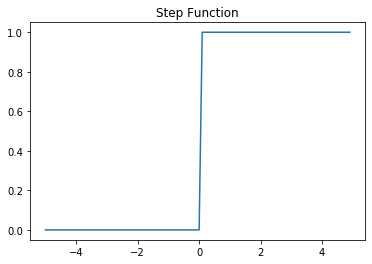

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

### (3) 시그모이드 함수(Sigmoid function)와 기울기 소실

<img src=simple-neural-network.png width=400>

- 인공 신경망의 학습 과정
    - 입력에 대해서 순전파(forward propagation) 연산을 함
    - 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산
    - 이 손실(loss)을 미분을 통해서 <ins>기울기(gradient)</ins>를 구하고, 이를 통해 역전파(back propagation)를 수행

- 시그모이드 함수의 문제점 : **Gradient vanishing**

<img src=시그모이드함수2.png width=300>

- 주황색 부분에서 기울기가 0에 가까운 작은 값 발생
- 역전파 과정에서 0에 가까운 작은 기울기가 곱해지면 앞단에는 기울기가 전달X$\Longrightarrow$ **Vanishing Gradient**

<img src=기울기_소실.png width=500>

출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만, 앞단으로 갈수록 기울기가 제대로 전파X  
$\Longrightarrow$ 시그모이드 함수를 은닉층에서 사용하는 것은 지양됌

### (4) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)
> -1초과 1미만의 값으로 변환

- 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 큼
- 그래서 시그모이드보다는 기울기 소실 증상이 적은편 $\Longrightarrow$ 은닉층에서 시그모이드보다 많이 사용됌

### (5) 렐루 함수(ReLU)
> $f(x) = max(0,x)$

- 인기 많음
- 입력값이 음수면 기울기도 0
- 뉴런은 다시 회생시키는 것이 매우 어렵
- 죽은 렐루(dying ReLU)

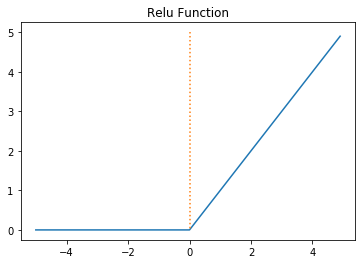

In [3]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

### (6) 리키 렐루(Leaky ReLU)
> ReLU를 보완하기 위해 등장  
$f(x) =max(ax,x)$  
a는 일반적으로 0.01

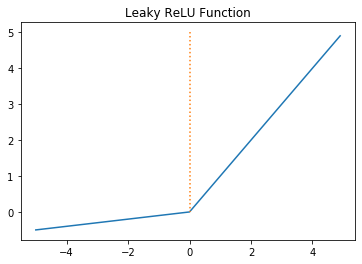

In [4]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

### (7) 소프트맥스 함수(Softamx function)
- 시그모이드처럼 출력층의 뉴런에서 주로 사용
- 시그모이드 : 이진 분류(Binary Classification)
- 소프트맥스 : 다중 클래스분류(Multi-Class Classification)

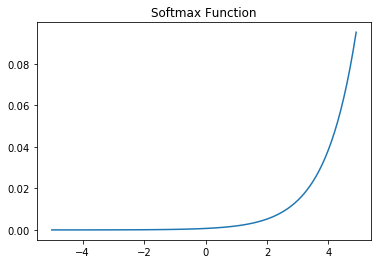

In [5]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## 4) 행렬의 곱셈을 이용한 순전파(Forward Propagation)
<img src=neuralnetwork_final.png width=300>

In [6]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential() # 층을 추가할 준비
model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
# 입력층(4)과 다음 은닉층(8) 그리고 은닉층의 활성화 함수는 relu
model.add(Dense(8, activation='relu')) # 은닉층(8)의 활성화 함수는 relu
model.add(Dense(3, activation='softmax')) # 출력층(3)의 활성화 함수는 softmax

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


C:\Users\jnh78\Anaconda3\envs\tutorial\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
